<a href="https://colab.research.google.com/github/isa-ulisboa/greends-pml/blob/main/fast_ai_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting survival of Titanic passengers

Need at least v1.0.25 of `fastai` so update default Kaggle version.

In [7]:
!pip install -q fastai --upgrade

In [21]:
from fastai import *
from fastai.tabular import *

## Load data

In [41]:
import pandas as pd
#path = Path('/content/drive/MyDrive/AAA/Lesson_5/titanic_data')
train_df = pd.read_csv('/content/drive/MyDrive/AAA/Lesson_5/titanic_data/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/AAA/Lesson_5/titanic_data/test.csv')

## Feature engineering
- Extract *Title* from the name colum. 
- Extract *Deck* from the first character of the cabin number.
- Fill in missing *Age* values with the mean age for passengers with the same title.

In [42]:
for df in [train_df, test_df]:
    df['Title'] = df['Name'].str.split(',').str[1].str.split(' ').str[1]
    df['Deck'] = df['Cabin'].str[0]

# find mean age for each Title across train and test data sets
all_df = pd.concat([train_df, test_df], sort=False)
mean_age_by_title = all_df.groupby('Title').mean()['Age']
# update missing ages
for df in [train_df, test_df]:
    for title, age in mean_age_by_title.iteritems():
        df.loc[df['Age'].isnull() & (df['Title'] == title), 'Age'] = age

In [43]:
test_df.Fare.fillna(0,inplace=True)


## Fastai setup

In [38]:
from fastai.tabular.all import *
dep_var = 'Survived'
cat_names = ['Pclass', 'Sex', 'Embarked', 'Title', 'Deck']
cont_names = ['Age', 'Fare', 'SibSp', 'Parch']
procs = [FillMissing,Categorify, Normalize] #, 

In [46]:
splits = RandomSplitter(valid_pct=0.2)(range_of(df))
to = TabularPandas(train_df, procs=[Categorify, FillMissing,Normalize],
                   cat_names=cat_names ,
                   cont_names = cont_names,
                   y_names=dep_var,
                   splits=splits)

In [47]:
dls = to.dataloaders(bs=64)

In [ ]:
dls.show_batch()

In [49]:
learn = tabular_learner(dls, metrics=accuracy)

SuggestedLRs(valley=0.0010000000474974513)

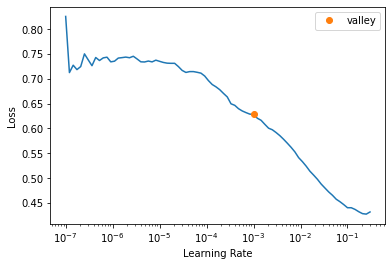

In [50]:
learn.lr_find()

In [ ]:
learn.fit(15, 1e-2)